# Capstone Spring Quarter : Natural Language Processing  

## Objective - Our model should convert any input string into a vector as accurately as possible. It will act as a pipeline for our further NLP analysis.   

### Chosen Dataset - Covid-19 releated news is collected from various articles.  The dataset consists of the following columns: authors, title, publish_date, description, text and URL. We are mainly going to concentrate on the text column for our NLP analysis.

### Data Cleaning Steps:

In [1]:
# import the necessary packages

import pandas as pd
import numpy as np

In [2]:
# Loading our dataset as a dataframe using pandas 
df = pd.read_csv('news.csv', delimiter =',')

In [3]:
df.head(3)

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...


In [4]:
#shape of the dataset

df.shape

(3566, 7)

In [55]:
df.describe()

,authors,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
count,3566,3566,3566,3566,3566,3566,3566
unique,36,2755,2755,2755,2755,2755,2755
top,cbc,A generation of older American voters that alr...,A generation of older American voters that alr...,"[a, generation, of, older, american, voters, t...","[generation, older, american, voters, already,...","[gener, older, american, voter, alreadi, unive...","[generation, older, american, voter, already, ..."
freq,1966,6,6,6,6,6,6


In [6]:
# Dropping unwanted columns from the dataset
df.drop(["Unnamed: 0",'publish_date','url','title','description'], axis = 1, inplace = True)

In [7]:
df.head()

,authors,text
0,['Cbc News'],Canadian pharmacies are limiting how much medi...
1,['Cbc News'],The Yukon government has identified two places...
2,['The Associated Press'],The Senate late Wednesday passed an unparallel...
3,['Cbc News'],Scientists around the world are racing to find...
4,['Cbc News'],Trudeau says rules of Quarantine Act will ...


In [9]:
#stripping the authors column from special characters 

df['authors'] = df['authors'].str.strip('[]')
df['authors'] = df['authors'].str.strip('  ''')
df['authors'] = df.authors.str.replace("[({':]", "")
df['authors'] = df['authors'].str.lower()

In [10]:
df.head()

,authors,text
0,cbc news,Canadian pharmacies are limiting how much medi...
1,cbc news,The Yukon government has identified two places...
2,the associated press,The Senate late Wednesday passed an unparallel...
3,cbc news,Scientists around the world are racing to find...
4,cbc news,Trudeau says rules of Quarantine Act will ...


In [54]:
df['authors'].nunique()

36

In [12]:
#df['authors'].unique()

#### Cleaning Authors Column

In [13]:
import re

df['authors'].replace(to_replace = [r'cbcs?\b.*',r'.*\bcbcs?', r'.*cbcnews.*'], value='cbc', regex=True, inplace=True)
df['authors'].replace(to_replace = ['the associated press'], value='associated press', inplace=True)
df['authors'].replace(to_replace = [r'canadian?\b.*',r'.*\bcanadian?'], value='canadian', regex=True, inplace=True)
df['authors'].replace(to_replace = [r'freelancer?\b.*',r'.*\bfreelancer?'], value='freelancer', regex=True, inplace=True)


In [14]:
df['authors'].nunique()

36

### NLP Basics: Implementing a pipeline to clean text

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes. These would be loaded to machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. **Lemmatize/Stem**

In [15]:
df.head()

,authors,text
0,cbc,Canadian pharmacies are limiting how much medi...
1,cbc,The Yukon government has identified two places...
2,associated press,The Senate late Wednesday passed an unparallel...
3,cbc,Scientists around the world are racing to find...
4,cbc,Trudeau says rules of Quarantine Act will ...


### Remove punctuation

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [18]:
df['body_text_clean'] = df['text'].apply(lambda x: remove_punct(x))

In [19]:
df.head()

,authors,text,body_text_clean
0,cbc,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...
1,cbc,The Yukon government has identified two places...,The Yukon government has identified two places...
2,associated press,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...
3,cbc,Scientists around the world are racing to find...,Scientists around the world are racing to find...
4,cbc,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...


### Test Tokenization

In [20]:
import re

In [21]:
def tokenize(text):
    tokens = re.split('\\W+', text)
    return tokens

In [22]:
df['body_text_tokenized'] = df['body_text_clean'].apply(lambda x: tokenize(x.lower()))

In [23]:
df.head()

,authors,text,body_text_clean,body_text_tokenized
0,cbc,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc..."
1,cbc,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,..."
2,associated press,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp..."
3,cbc,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ..."
4,cbc,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ..."


### Remove stopwords

In [24]:
import nltk

#from nltk.corpus import stopwords
#stopwords.words('english')

In [25]:
stopword = nltk.corpus.stopwords.words('english')

In [26]:
#stopword

In [27]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

In [28]:
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

### Supplemental Data Cleaning: Using Stemming

In [29]:
import nltk

ps = nltk.PorterStemmer()   

In [30]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [31]:
df['body_text_stemmed'] = df['body_text_nostop'].apply(lambda x: stemming(x))

In [32]:
df.head()

,authors,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,cbc,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe..."
1,cbc,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor..."
2,associated press,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled...","[senat, late, wednesday, pass, unparallel, 22,..."
3,cbc,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ...","[scientists, around, world, racing, find, nove...","[scientist, around, world, race, find, novel, ..."
4,cbc,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ...","[, trudeau, says, rules, quarantine, act, enfo...","[, trudeau, say, rule, quarantin, act, enforc,..."


### Supplemental Data Cleaning: Using a Lemmatizer

In [33]:
# nltk.download()
import nltk

# https://wordnet.princeton.edu/|
wn = nltk.WordNetLemmatizer()   
ps = nltk.PorterStemmer()

In [34]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [35]:
df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [36]:
df.head(2)

,authors,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,cbc,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe...","[canadian, pharmacy, limiting, much, medicatio..."
1,cbc,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor...","[yukon, government, identified, two, place, wh..."


In [37]:
len(df['body_text_lemmatized'])

3566

In [38]:
print("Total words in first row i.e row 0:",len(df['body_text_lemmatized'][0]))
print("Total words in first row i.e row 1:",len(df['body_text_lemmatized'][1]))

Total words in first row i.e row 0: 242
Total words in first row i.e row 1: 179


## Doc2Vec using Infer Vector

In [39]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

E:\installs\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [40]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [41]:
df.head(1)

,authors,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,cbc,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe...","[canadian, pharmacy, limiting, much, medicatio..."


In [42]:
tagged_data = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['body_text_lemmatized'])]

In [43]:
tagged_data[0:2]

[TaggedDocument(words=['canadian', 'pharmacy', 'limiting', 'much', 'medication', 'dispensed', 'try', 'prevent', 'shortage', 'recognizing', 'active', 'ingredient', 'drug', 'come', 'india', 'china', 'medical', 'supply', 'chain', 'disrupted', 'spread', 'covid19', 'provincial', 'regulatory', 'college', 'complying', 'canadian', 'pharmacist', 'association', 'call', 'limit', 'amount', 'medication', 'given', 'patient', '30day', 'supply', 'goal', 'stop', 'people', 'refilling', 'prescription', 'early', 'ensure', 'lifesaving', 'drug', 'dont', 'run', 'short', 'supply', 'chain', 'vulnerable', 'mina', 'tadrous', 'pharmacist', 'researcher', 'toronto', 'monitor', 'pharmaceutical', 'supply', 'worried', 'canadian', 'start', 'stockpiling', 'drug', 'watching', 'unfolding', 'u', 'region', 'virus', 'spread', 'said', 'pharmacist', 'concerned', 'drug', 'lifesaving', 'inhaler', 'people', 'might', 'stockpile', 'based', 'misinformation', 'circulating', 'potential', 'treatment', 'covid19', 'relationship', 'people

In [44]:
len(df['body_text_lemmatized'])

3566

In [45]:
len(documents) # So tags are 3565 as it starts from 0.

NameError: name 'documents' is not defined

In [46]:
max_epochs = 100
vec_size = 30
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

In [47]:
for epoch in range(max_epochs):
    #print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

E:\installs\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """
E:\installs\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


In [56]:

model= Doc2Vec.load("d2v.model")

#to find the vector of a document which is not in training data
test_data = word_tokenize("Corona in the United States of america is spreading fast".lower())
print("Tokenized test data: ",test_data)
v1 = model.infer_vector(test_data)
print("V1_infer:", v1)

Tokenized test data:  ['corona', 'in', 'the', 'united', 'states', 'of', 'america', 'is', 'spreading', 'fast']
V1_infer: [ 0.05474649 -0.18694623  0.43066284 -0.33579034  0.43671006  0.12189305
 -0.7076284   0.03824276  0.05784702  0.34162238  0.01585212 -0.12883252
 -0.38029352 -0.09071592  0.24238719  0.15802957  0.25449184 -0.47887805
 -0.09887888 -0.07103173  0.30714282 -0.00150427  0.0347969   0.2568174
 -0.00250598  0.13633123 -0.31313524  0.01635652 -0.03133101  0.18294844]


In [57]:
test_data = word_tokenize("Corona in the United States of america is spreading fast".lower())
print("Tokenized test data: ",test_data)
v1 = model.infer_vector(test_data)
print("V1_infer:", v1)

Tokenized test data:  ['corona', 'in', 'the', 'united', 'states', 'of', 'america', 'is', 'spreading', 'fast']
V1_infer: [-0.09682442 -0.04755518  0.08682884 -0.22454755  0.00922025 -0.00543541
 -0.27030033  0.05903429 -0.00185839  0.31045967 -0.09666033 -0.04756739
 -0.3489812   0.00078842  0.18286347  0.00707955  0.18357012 -0.33267692
  0.08687953 -0.29817784  0.37683252 -0.12900683  0.03160846  0.10122649
  0.02346398  0.03133685 -0.2421346  -0.05171006  0.06498364 -0.01587427]


In [58]:
test_data_1 = word_tokenize("The quicj brown fox jumps over the lazy dog".lower())
print("Tokenized test data: ",test_data_1)
v2 = model.infer_vector(test_data_1)
print("V2_infer:", v2)

Tokenized test data:  ['the', 'quicj', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
V2_infer: [ 0.19315116  0.331444    0.42432454  0.34179935  0.4792607   0.04262666
  0.3369535   0.571146    0.71973133  0.11039036  0.3621836  -0.2349265
 -0.51688033  0.19676137  0.5716734  -0.19513811  0.03045566 -0.2512851
 -0.21922623 -0.26249784  0.10260175  0.31891283 -0.0038903   0.18469568
  0.03702645 -0.11622825 -0.23682769 -0.14786597 -0.02597615 -0.03519983]


The measure computes the cosine of the angle between vectors x and y. A cosine value of 0 means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.

In [89]:
data = ["the quick brown fox",\
        "Corona is spreading"]


In [90]:
def clean_cos(cos_angle):
    return min(1,max(cos_angle,-1))

In [91]:
from sklearn.metrics.pairwise import cosine_similarity
import math
vectors = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    print("*"*40)
    print("Vector list for the given data: ",vectors)
    print("*"*40)
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            import math
            #vec1 = vectors[i].reshape(1,-1)
            #vec2 = vectors[j].reshape(1,-1)
            #sim= cosine_similarity(vec1, vec2)
            vec1 = vectors[i]
            vec2 = vectors[j]
            sim = (np.dot(vec1,vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec2)))
            # # The dot product divided by the product magnitude of the two vectors
            print("Similarity of \"{}\" and \"{}\" is {}" .format(data[i],data[j],sim))
            #cos_sim = sim  # this is the score for v1 and v2
            #angle_in_radians = math.acos(sim)
            #print("Degrees: ",math.degrees(angle_in_radians))
            #print("*"*40)
            cos_sim = clean_cos(sim)
            angle_in_radians = math.acos(cos_sim)
            print("Degrees: ",math.degrees(angle_in_radians))
            

In [92]:
# Function Call:
# https://www.youtube.com/watch?v=R2j0BU0_a5Q
String2vec(data)

E:\installs\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Tokenized data:   ['the', 'quick', 'brown', 'fox']
Tokenized data:   ['corona', 'is', 'spreading']
****************************************
Vector list for the given data:  [array([-0.05086376,  0.17542231,  0.23941806, -0.00363137,  0.34399483,
        0.01175786, -0.15333486,  0.1605889 , -0.01843782,  0.04530309,
        0.51293564,  0.02586666, -0.25724027, -0.05552271,  0.18104297,
       -0.06980534, -0.17451516, -0.5501389 , -0.24975424, -0.384205  ,
        0.32582182, -0.19135354, -0.09339289,  0.12036008, -0.2068932 ,
       -0.14023496, -0.08336107, -0.2580585 , -0.20925769, -0.03613532],
      dtype=float32), array([ 0.07224711,  0.24380271,  0.05376576, -0.0391388 ,  0.17324539,
        0.10364269, -0.3796607 , -0.15795377,  0.11596161,  0.4618122 ,
       -0.01598107, -0.15767652, -0.40725628,  0.06473371,  0.16143666,
        0.01489585,  0.16282204, -0.47164136,  0.2956118 , -0.12879716,
       -0.01105958, -0.15240833,  0.11011799, -0.01085296, -0.01875081,
       -0.0

### Finding similarity between any given input string to the pharses in the document

In [93]:
## Train doc2vec model
model_1 = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)

In [94]:
# Save trained doc2vec model
model_1.save("test_doc2vec.model")

E:\installs\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [95]:
## Load saved doc2vec model
model_1= Doc2Vec.load("test_doc2vec.model")

E:\installs\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [67]:
## Print model vocabulary
#model_1.wv.vocab

In [96]:
# most_similar: Finds the top-N most similar words. 
# Positive words contribute positively towards the similarity, negative words negatively.
# This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. 
# find most similar doc 
test_doc = word_tokenize("health is at risk".lower())
model_1.docvecs.most_similar(positive=[model_1.infer_vector(test_doc)],topn=10)

[(3221, 0.751115620136261),
 (3234, 0.7457507252693176),
 (2655, 0.7358067035675049),
 (2687, 0.7352978587150574),
 (2468, 0.7128937840461731),
 (2813, 0.7124762535095215),
 (2232, 0.709732711315155),
 (2452, 0.7077028751373291),
 (2608, 0.705782949924469),
 (363, 0.7051135301589966)]

### HeatMap for list of synonyms

In [97]:
cosine_degree = []

In [98]:
from sklearn.metrics.pairwise import cosine_similarity
import math
vectors = []
pair_list = []
cosine_degree = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    #print("*"*40)
    #print("Vector list for the given data: ",vectors)
    #print("*"*40)
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            import math
            #vec1 = vectors[i].reshape(1,-1)
            #vec2 = vectors[j].reshape(1,-1)
            #sim= cosine_similarity(vec1, vec2)
            vec1 = vectors[i]
            vec2 = vectors[j]
            sim = (np.dot(vec1,vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec2)))
            # # The dot product divided by the product magnitude of the two vectors
            print("Similarity of \"{}\" and \"{}\" is {}" .format(data[i],data[j],sim))
            pair = data[i],data[j]
            pair_list.append(pair)
            #cos_sim = sim  # this is the score for v1 and v2
            #angle_in_radians = math.acos(sim)
            #print("Degrees: ",math.degrees(angle_in_radians))
            #print("*"*40)
            cos_sim = clean_cos(sim)
            angle_in_radians = math.acos(cos_sim)
            print("Degrees: ",math.degrees(angle_in_radians))
            cosine_degree.append(math.degrees(angle_in_radians))
            #return math.degrees(angle_in_radians)

In [99]:
import pandas as pd

df_phrases = pd.read_excel('wordsExcel.xlsx')

In [100]:
String2vec(df_phrases['Synonyms_List'])

E:\installs\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Tokenized data:   ['government', ',', 'administration', ',', 'executive', ',', 'regime', ',', 'cabinet', ',', 'ministry']
Tokenized data:   ['healthy', ',', 'hefty', ',', 'alright', ',', 'in', 'good', 'shape', ',', 'salubrious', ',', 'goodly', '.']
Tokenized data:   ['family', ',', 'menage', ',', 'household', ',', 'ancestry']
Tokenized data:   ['symptoms', ',', 'manifestation', ',', 'indication', ',', 'indicator', ',', 'sign', ',', 'mark', ',', 'feature', ',', 'trait']
Tokenized data:   ['home', ',', 'place', ',', 'dwelling_house', ',', 'menage', ',', 'household', ',', 'base', ',', 'house', ',', 'home', ',', 'interior', ',', 'domicile', ',', 'dwelling', ',', 'internal', ',', 'habitation', ',', 'abode']
Tokenized data:   ['country', ',', 'state', ',', 'nation', ',', 'sovereign', 'state', ',', 'kingdom', ',', 'realm', ',', 'territory', ',', 'province', ',', 'palatinate', ',', 'empire', ',', 'commonwealth', ',', 'homeland']
Tokenized data:   ['worker', ',', 'employee', ',', 'labourer', ',

Degrees:  101.67755323270785
Similarity of "Recovering, find, convalesce, recoup, regain, go_back, reclaim, recuperate, recover, convalescent, retrieve" and "Worse, worsened, tough, spoiled, spoilt, regretful,risky, high-risk, defective" is 1.2040143013000488
Degrees:  0.0
Similarity of "Recovering, find, convalesce, recoup, regain, go_back, reclaim, recuperate, recover, convalescent, retrieve" and "School, schoolhouse, schooling, schooltime, school_day, shoal, school, educate, train, cultivate, civilize, civilise" is -0.026482196524739265
Degrees:  91.51749549999586
Similarity of "Recovering, find, convalesce, recoup, regain, go_back, reclaim, recuperate, recover, convalescent, retrieve" and "Parent, rear, raise, bring_up, nurture" is -0.020691661164164543
Degrees:  91.1856294696103
Similarity of "Recovering, find, convalesce, recoup, regain, go_back, reclaim, recuperate, recover, convalescent, retrieve" and " Children, child, kid, youngster, minor, shaver, nipper, small_fry, tiddler,

Degrees:  85.66316067484958
Similarity of "Isolate, set_apart, sequester, keep_apart, insulate, quarantine, " and "Healthy, Hefty, alright, in good shape, salubrious, goodly." is 0.34710633754730225
Degrees:  69.68957241648674
Similarity of "Isolate, set_apart, sequester, keep_apart, insulate, quarantine, " and "Family, menage, household, ancestry" is 0.20406727492809296
Degrees:  78.2250963354278
Similarity of "Isolate, set_apart, sequester, keep_apart, insulate, quarantine, " and "Symptoms, Manifestation, indication, indicator, sign, mark, feature, trait" is 0.03023235686123371
Degrees:  88.26754957012162
Similarity of "Isolate, set_apart, sequester, keep_apart, insulate, quarantine, " and "Home, place, dwelling_house, menage, household, base, house, home, interior, domicile, dwelling, internal, habitation, abode" is 0.047393038868904114
Degrees:  87.28356134774494
Similarity of "Isolate, set_apart, sequester, keep_apart, insulate, quarantine, " and "country , State, nation, sovereig

Degrees:  83.13569802378339
Similarity of "Economy, economic_system, thriftiness, saving" and "Plan, design, program, project" is 0.28516724705696106
Degrees:  73.4311539966741
Similarity of "Economy, economic_system, thriftiness, saving" and "Savings, Economize, economy, save, preserve, preservation, keep" is 0.21123437583446503
Degrees:  77.80530037232657
Similarity of "Economy, economic_system, thriftiness, saving" and "Build, Construct, form, make, establish, frame," is 0.2381376326084137
Degrees:  76.22335203913782
Similarity of "Economy, economic_system, thriftiness, saving" and "Needs, necessitate, needs, indigence, require, want, call_for, demand" is 0.3268255889415741
Degrees:  70.92378551290784
Similarity of "Economy, economic_system, thriftiness, saving" and "Isolate, set_apart, sequester, keep_apart, insulate, quarantine, " is 0.41905882954597473
Degrees:  65.22481828210242
Similarity of "Economy, economic_system, thriftiness, saving" and "Time, meter, metre, clip, clock_ti

Similarity of "Safe, Secure, intact, guarded, protected" and "Economy, Recession, decrease, cutback, economy" is 0.20622731745243073
Degrees:  78.09864551834423
Similarity of "Safe, Secure, intact, guarded, protected" and "Official, Administration, manager, agent, officer" is 0.27571505308151245
Degrees:  73.99536881896951
Similarity of "Mask, Camouflage, veil, cloak, protect" and "Government, Administration, executive, regime, cabinet, ministry" is 0.6218379139900208
Degrees:  51.54952674057113
Similarity of "Mask, Camouflage, veil, cloak, protect" and "Healthy, Hefty, alright, in good shape, salubrious, goodly." is 2.6965630054473877
Degrees:  0.0
Similarity of "Mask, Camouflage, veil, cloak, protect" and "Family, menage, household, ancestry" is 0.9873944520950317
Degrees:  9.107008917203455
Similarity of "Mask, Camouflage, veil, cloak, protect" and "Symptoms, Manifestation, indication, indicator, sign, mark, feature, trait" is 0.3588027358055115
Degrees:  68.97331387309058
Similarit

In [101]:
# create a dataframe
df_phrasemap = pd.DataFrame({'pair': pair_list, 'similarity': cosine_degree})
df_phrasemap.head()

,pair,similarity
0,"(Government, Administration, executive, regime...",0.019782
1,"(Government, Administration, executive, regime...",0.000000
2,"(Government, Administration, executive, regime...",0.000000
3,"(Government, Administration, executive, regime...",75.567616
4,"(Government, Administration, executive, regime...",64.540188


In [102]:
# make a copy
df_temp = df_phrasemap.copy()

In [103]:
# convert list of tuples into 2 lists
list1 = []
list2 = []


#Label1 and label2 should be like (label1, label2)
#label1 =[]
#label2 =[]
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)


In [104]:
# add two columns to df_temp
df_temp['Phrase1'] = list1
df_temp['Phrase2'] = list2

In [105]:
df_temp.head()

,pair,similarity,Phrase1,Phrase2
0,"(Government, Administration, executive, regime...",0.019782,"Government, Administration, executive, regime,...","Government, Administration, executive, regime,..."
1,"(Government, Administration, executive, regime...",0.000000,"Government, Administration, executive, regime,...","Healthy, Hefty, alright, in good shape, salubr..."
2,"(Government, Administration, executive, regime...",0.000000,"Government, Administration, executive, regime,...","Family, menage, household, ancestry"
3,"(Government, Administration, executive, regime...",75.567616,"Government, Administration, executive, regime,...","Symptoms, Manifestation, indication, indicator..."
4,"(Government, Administration, executive, regime...",64.540188,"Government, Administration, executive, regime,...","Home, place, dwelling_house, menage, household..."


In [106]:
# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.Phrase1, df_temp.Phrase2, round(df_temp.similarity, 2)))

In [107]:
df_temp['pairs'][2]

('Government, Administration, executive, regime, cabinet, ministry',
 'Family, menage, household, ancestry',
 0.0)

In [108]:
# labels are the first words in Phrase 1 and phrase 2.
# df_temp['Label1'] = df_temp['Phrase1'].map(lambda x: x[0])
# df_temp['Label2'] = df_temp['Phrase2'].map(lambda x: x[0])


df_temp['Label1'] = df_temp['Phrase1'].apply(lambda x: x.split(',')[0])

df_temp['Label2'] = df_temp['Phrase2'].apply(lambda x: x.split(',')[0])

In [109]:
# gr = df_temp.groupby(['Phrase1','Phrase2'])['similarity'].mean()
# Or
gr = df_temp.groupby(['Label1','Label2'])['similarity'].mean()


In [110]:
len(df_temp)

1600

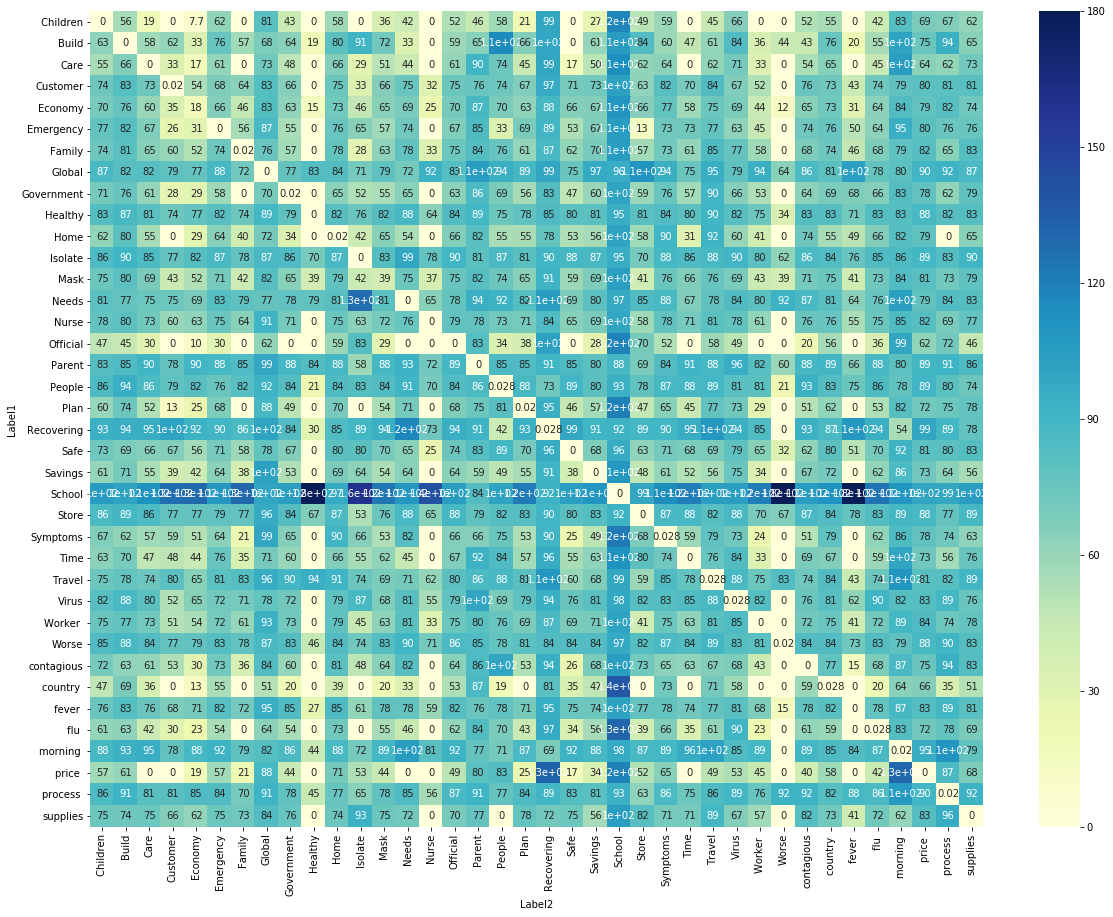

In [111]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(gr.unstack(),annot=True, ax= ax, cmap = "YlGnBu")

### Histogram for the list of words

In [113]:
df_similarity = df_temp[['pairs','Phrase1','Phrase2','similarity']]

In [116]:
df_similarity.similarity.describe()

count    1600.000000
mean       65.763345
std        29.587401
min         0.000000
25%        55.641734
50%        73.625071
75%        84.122325
max       180.000000
Name: similarity, dtype: float64

In [118]:
df_new= df_similarity.groupby(by = 'pairs',as_index=False).mean()

In [119]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

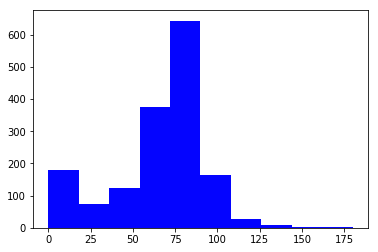

In [120]:
plt.hist(df_new['similarity'],facecolor='blue', alpha=5)
plt.show()

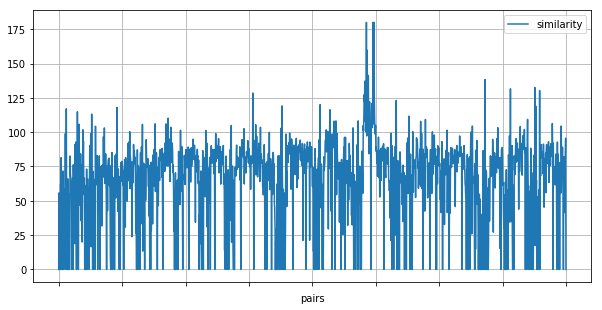

In [122]:
df_new.plot(x='pairs', y='similarity', figsize=(10,5), grid=True)

### Histogram for the Random words from web

In [123]:
word_From_net = ['method',  'technolog',  'qualiti',  'collect',  'post',  'remot',  'decemb',  'best',  'htql',  'laborintens',  'protocol',  'It',  'humancomput',  'would',  'endus',  'respons',  'particular',  'take',  'hundr',  'contain',  'done',  'store',  'embrac',  'entir',  'organ',  'websit',  'expressionmatch',  'typic',  'manual',  'view',  'xpath',  'metadata',  'histori',  'retriev',  'jumpstat',  'aggreg',  'search',  'compon',  'implement',  'els',  'platform',  'annot',  'offer',  'file',  'internet',  'listen',  'power',  'new',  'chang',  'index',  'In',  'extract',  'languag',  'link',  'data',  'directli',  'engin',  'wander',  'fetch',  'simul',  'solut',  'number',  'direct',  '2000',  'birth',  'techniqu',  'ebay',  'enabl',  'sever',  'hypertext',  'www',  'crawlerbas',  'grep',  'main',  'local',  'make',  'case',  'edit',  'exampl',  'nearli',  'sinc',  'work',  'crawl',  'templat',  'mozilla',  'python',  'perl',  'goal',  'learn',  'thousand',  'onc',  'design',  'approach',  'comparison',  'natur',  'embed',  'understand',  'gener',  'relat',  'central',  'artifici']

In [124]:
model= Doc2Vec.load("d2v.model")
vec_dict = []
#to find the vector of a document which is not in training data
for i in word_From_net:
    vec = model.infer_vector(i)
    vec_dict.append(vec)

E:\installs\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [125]:
import math
def similarity_func(vec1, vec2):
    sim = (np.dot(vec1,vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec2)))
    cos_sim = clean_cos(sim)
    angle_in_radians = math.acos(cos_sim)
    cosine_degree =math.degrees(angle_in_radians)
    return cos_sim, cosine_degree

In [126]:
similarity = []
degree = []
pairs = []
for i in range(len(word_From_net) -1):
    for j in range(len(word_From_net) -1):
        pair = word_From_net[i],word_From_net[j]
        pairs.append(pair)
        sim,deg = similarity_func(vec_dict[i],vec_dict[j])
        similarity.append(sim)
        degree.append(deg)

In [127]:
df_web_words = pd.DataFrame({'pairs': pairs, 'similarity': similarity, 'degree' : degree  })

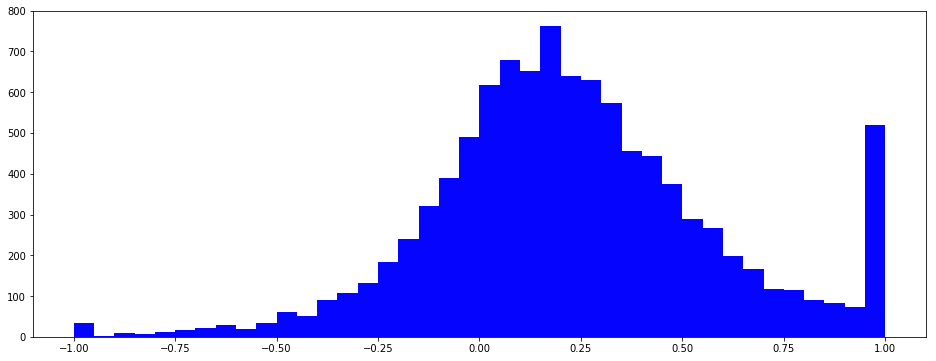

In [131]:
plt.figure(figsize=(16, 6))
plt.hist(df_web_words['similarity'],facecolor='blue', alpha=5, bins = 40)
plt.show()

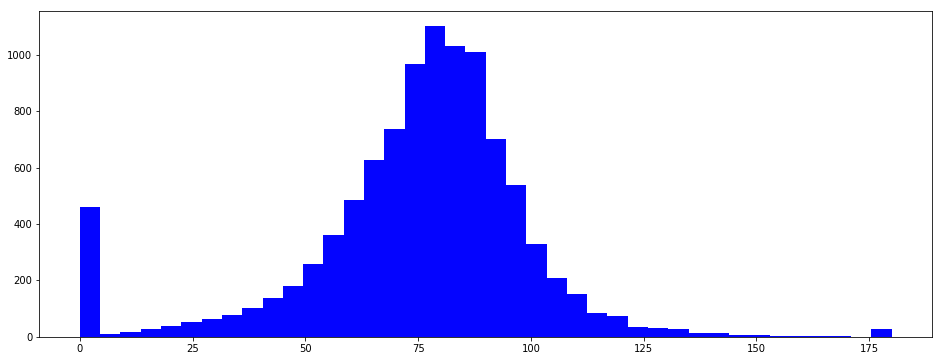

In [132]:
plt.figure(figsize=(16, 6))
plt.hist(df_web_words['degree'],facecolor='blue', alpha=5, bins = 40)
plt.show()

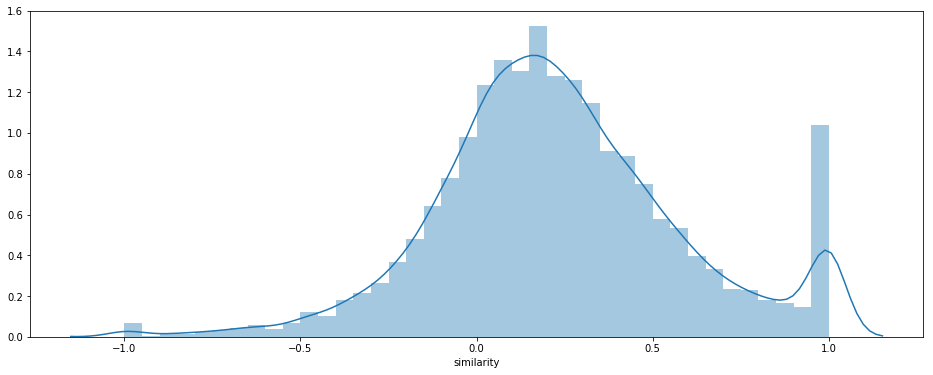

In [130]:
plt.figure(figsize=(16, 6))
sns.distplot(df_web_words['similarity'], kde = True, bins = 40)

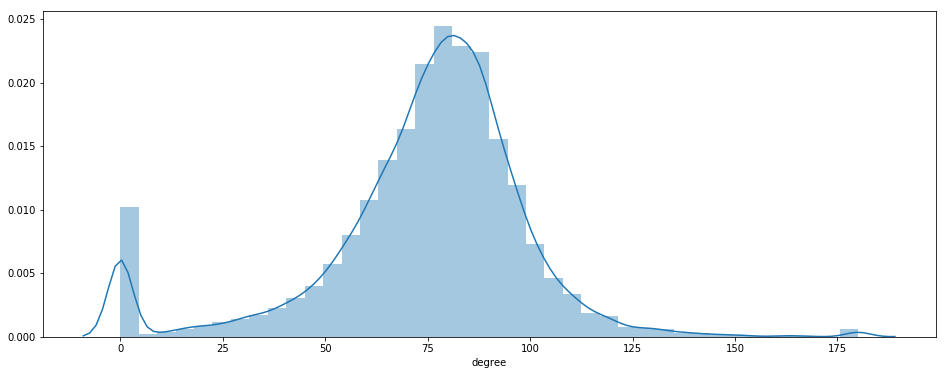

In [87]:
plt.figure(figsize=(16, 6))
sns.distplot(df_web_words['degree'], kde = True, bins = 40)

### End of code